# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

### Solution by luk6xff (June 2019)

## Overview
The goals of the project are the following:
* Load The Data
* Dataset Summary & Exploration
* Design and Test a Model Architecture
* Test a Model on New Images
* Visualize the Neural Network's State with Test Images

## Imports and project globals

In [60]:
# Imports
import pickle
import math
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import skimage

from sklearn.utils import shuffle
from tqdm import tqdm

# Visualizations will be shown in the notebook.
%matplotlib inline


A4_PORTRAIT = (8.27, 11.69)
A4_LANDSCAPE = A4_PORTRAIT[::-1]

---
## Step 0: Load The Data

### German traffic signs dataset used in this task is taken from: [here](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

### Before running make sure to download the data: [German Traffic Sign Dataset](https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip) and unzip it in main folder of the project.

In [61]:
# Load pickled data
# Fill this in based on where you saved the training and testing data
training_file   = '.././data/train.p'
validation_file = '.././data/valid.p'
testing_file    = '.././data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

# Read signames
sign_names = pd.read_csv('signnames.csv')['SignName']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [62]:
# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# Number of validation examples
n_validation = len(X_valid)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

### Visualize a few training data images

Random samples of German traffic sign dataset


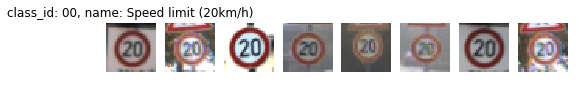

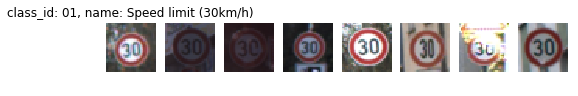

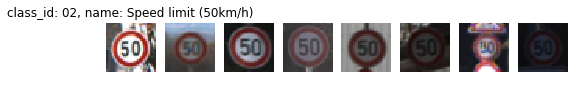

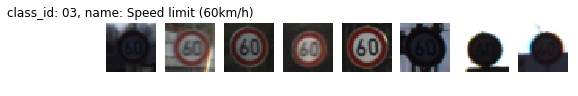

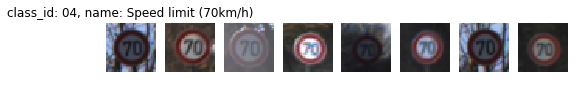

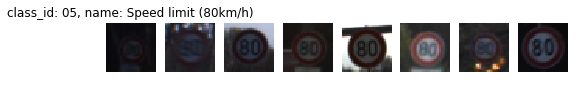

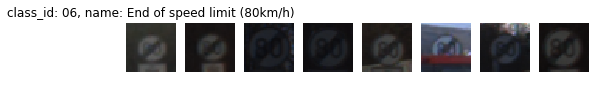

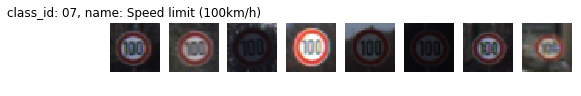

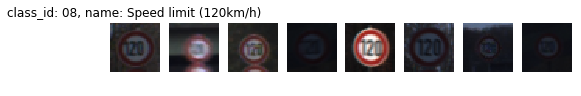

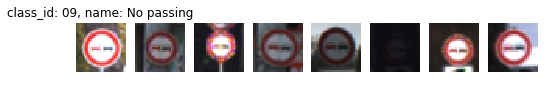

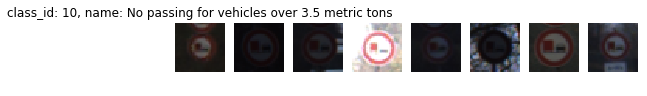

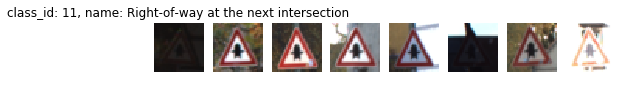

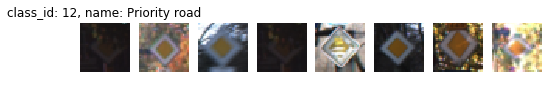

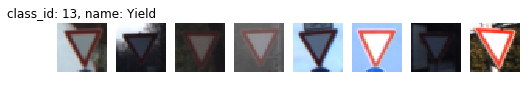

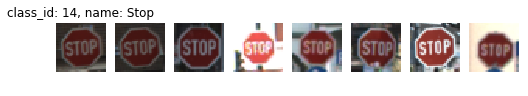

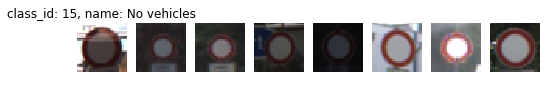

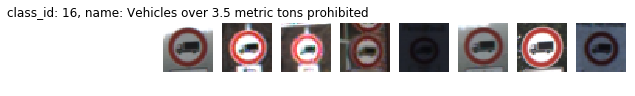

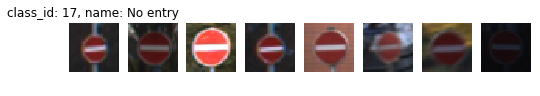

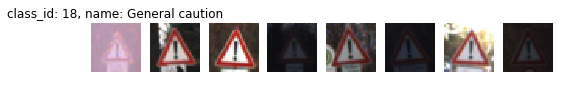

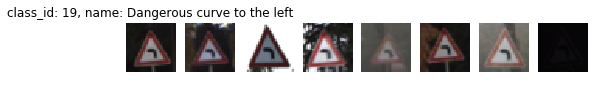

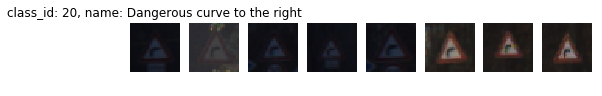

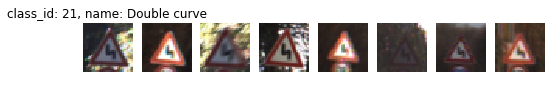

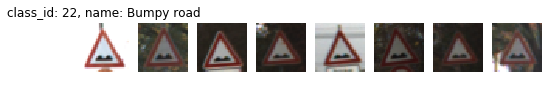

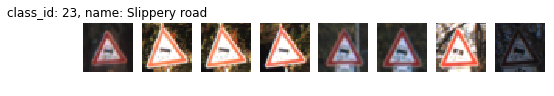

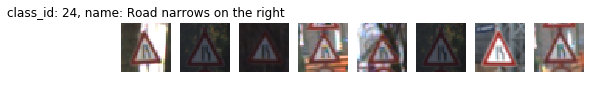

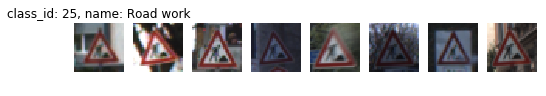

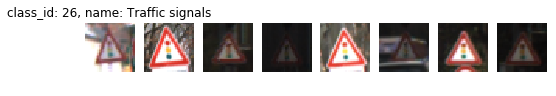

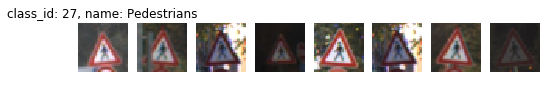

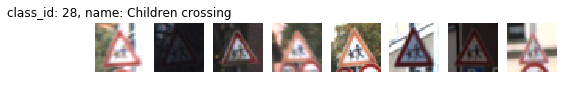

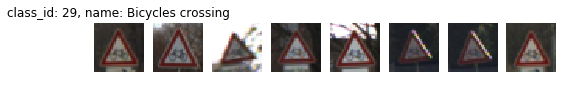

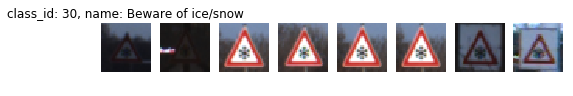

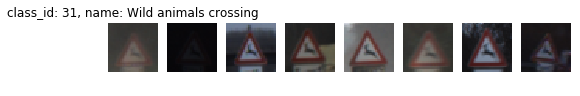

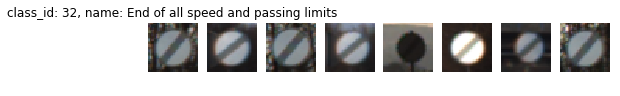

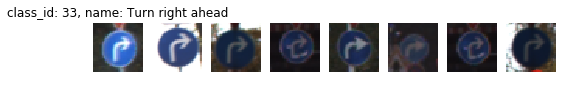

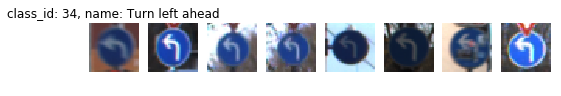

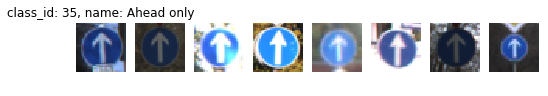

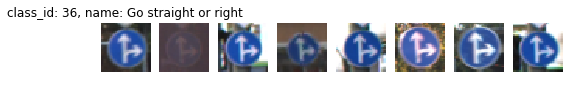

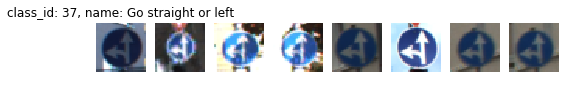

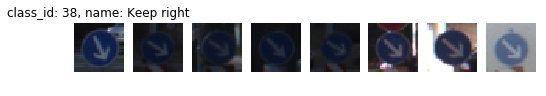

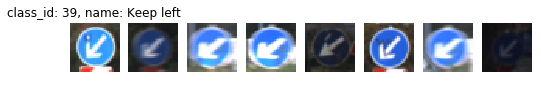

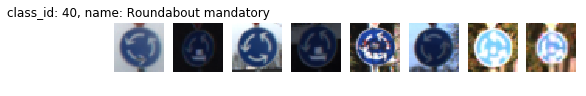

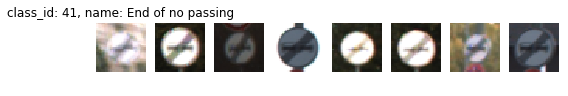

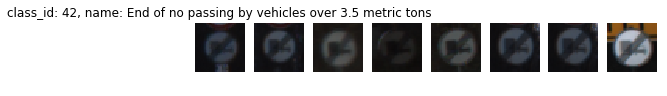

In [63]:
### Data exploration visualization code goes here.
num_of_images_per_row = 8

# Show a sample from each class of the traffic sign dataset
print("Random samples of German traffic sign dataset")

for class_id in range(n_classes):
    indexes = np.where(y_train == class_id) # Find index for given class_id
    images = X_train[np.random.choice(indexes[0], num_of_images_per_row)] # Extract random images to display
    fig, axes = plt.subplots(1, num_of_images_per_row, figsize=(8, 8))
    fig.set_size_inches(A4_PORTRAIT)
    axes[0].set_title('class_id: {:02d}, name: {}'.format(class_id,sign_names[class_id]))
    for i, img in enumerate(images):
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].grid(False)
    plt.show()
    plt.savefig('plots/Random_samples_of_German_traffic_sign_dataset-class-id-{}.png'.format(class_id) ,bbox_inches='tight')


### Show the histogram of label (class_id) frequency in training, validation and test sets

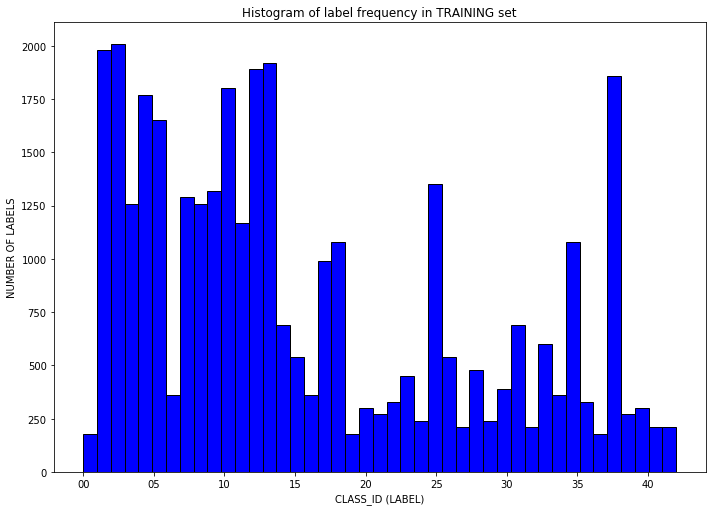

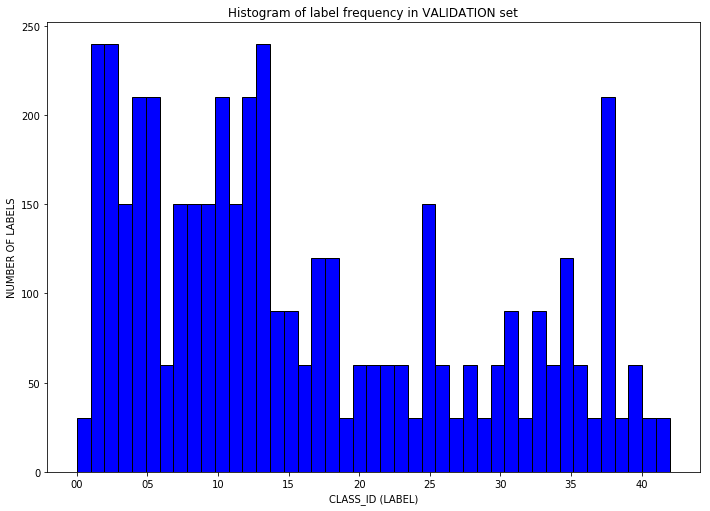

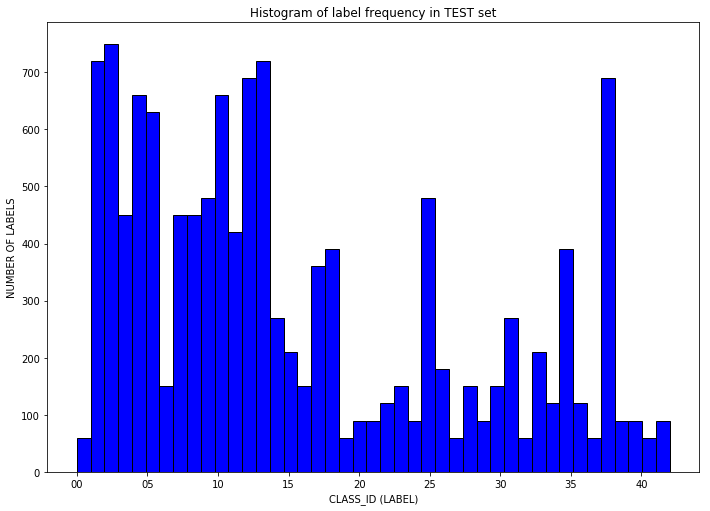

In [64]:
# Histogram of label frequency in TRAINING set
fig, ax = plt.subplots(figsize=A4_LANDSCAPE)

ax.set_ylabel('NUMBER OF LABELS')
ax.set_xlabel('CLASS_ID (LABEL)')
ax.set_title("Histogram of label frequency in TRAINING set")

ax.hist(y_train, bins=n_classes, histtype='bar', color='blue', edgecolor='black', rwidth=1, align='mid')
ax.set_xticks(np.arange(0, n_classes, 5))
ax.set_xticklabels(['{:02d}'.format(c) for c in range(0, n_classes, 5)])

plt.show()
plt.savefig('plots/Histogram of label frequency in TRAINING set.png', bbox_inches='tight')



# Histogram of label frequency in VALIDATION set
fig, ax = plt.subplots(figsize=A4_LANDSCAPE)

ax.set_ylabel('NUMBER OF LABELS')
ax.set_xlabel('CLASS_ID (LABEL)')
ax.set_title("Histogram of label frequency in VALIDATION set")

ax.hist(y_valid, bins=n_classes, histtype='bar', color='blue', edgecolor='black', rwidth=1, align='mid')
ax.set_xticks(np.arange(0, n_classes, 5))
ax.set_xticklabels(['{:02d}'.format(c) for c in range(0, n_classes, 5)])

plt.show()
plt.savefig('plots/Histogram of label frequency in VALIDATION set.png', bbox_inches='tight')



# Histogram of label frequency in TEST set
fig, ax = plt.subplots(figsize=A4_LANDSCAPE)

ax.set_ylabel('NUMBER OF LABELS')
ax.set_xlabel('CLASS_ID (LABEL)')
ax.set_title("Histogram of label frequency in TEST set")

ax.hist(y_test, bins=n_classes, histtype='bar', color='blue', edgecolor='black', rwidth=1, align='mid')
ax.set_xticks(np.arange(0, n_classes, 5))
ax.set_xticklabels(['{:02d}'.format(c) for c in range(0, n_classes, 5)])

plt.show()
plt.savefig('plots/Histogram of label frequency in TEST set.png', bbox_inches='tight')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [65]:
### Preprocess the data here. It is required to normalize the data.

# As stated in Yann Lecun's publication cited above, I will use a grayscale image to get better results
def rgb2Grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


def equalize(img):
    '''
    Used to obtain an increased contrast of an image
    '''
    return cv2.equalizeHist(img)


def normalize(img):
    max_img = np.max(img)
    min_img = np.min(img)
    return (img - min_img)/(max_img - min_img)


def normalize2(img):
    return cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)


def preprocess_data(dataset):
    return np.array([np.expand_dims(normalize(equalize(rgb2Grayscale(img))), axis=2) for img in dataset]) 


# Do preprocessing
X_train_n = preprocess_data(X_train)
X_valid_n = preprocess_data(X_valid)
X_test_n  = preprocess_data(X_test)
# print(X_train[0].shape, X_train_n[0].shape)

### Visualize pre-processed data

Below You can see the difference between original RGB image and the normalized one.

Original, not normalized samples of German traffic sign dataset



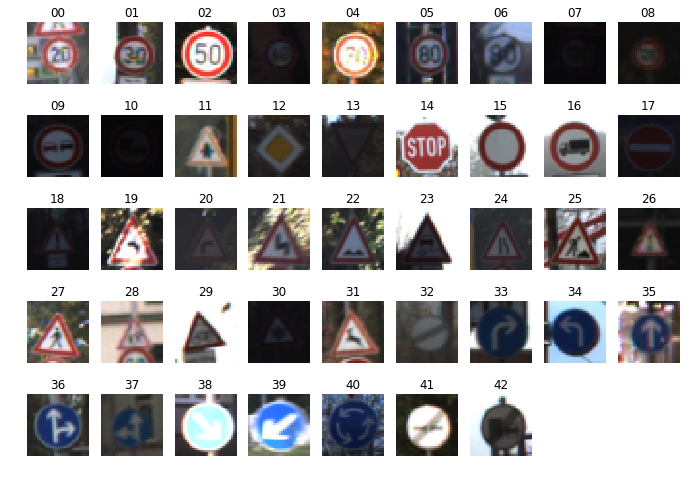

Normalized samples of German traffic sign dataset



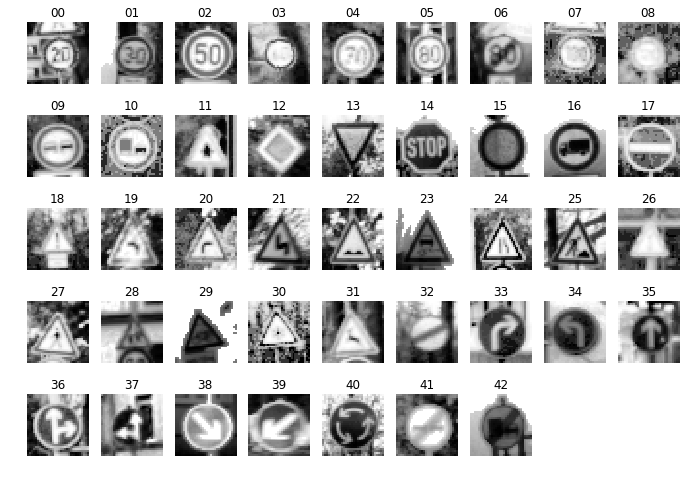

In [66]:
# Show a sample from each class of the traffic sign dataset
print("Original, not normalized samples of German traffic sign dataset\n")
fig, axes = plt.subplots(5, 9, figsize=(8, 8))
fig.set_size_inches(A4_LANDSCAPE)
class_id = 0

#
chosen_indexes = []
for row in axes:
    for ax in row:
        if class_id < n_classes:
            indexes = np.where(y_train == class_id)
            idx_rnd = np.random.choice(indexes[0], 1)
            chosen_indexes.append(idx_rnd)
            img = X_train[idx_rnd]
            ax.imshow(img[0])
            ax.set_title('{:02d}'.format(class_id))
        ax.axis('off')
        ax.grid(False)
        class_id += 1
plt.show()
plt.savefig('plots/Original, not normalized samples of German traffic sign dataset.png', bbox_inches='tight')

print("Normalized samples of German traffic sign dataset\n")
fig, axes = plt.subplots(5, 9, figsize=(8, 8))
fig.set_size_inches(A4_LANDSCAPE)
class_id = 0
for row in axes:
    for ax in row:
        if class_id < n_classes:
            img_n = X_train_n[chosen_indexes[class_id]]
            ax.imshow(img_n[0,:,:,0], cmap='gray')
            ax.set_title('{:02d}'.format(class_id))
        ax.axis('off')
        ax.grid(False)         
        class_id += 1
plt.show()
plt.savefig('plots/Normalized samples of German traffic sign dataset.png', bbox_inches='tight')

### Dataset augmentation
For a more robust model I have decided to augment the training dataset

In [67]:
# Based on http://androidkt.com/tensorflow-image-augmentation-using-tf-image/
#          https://www.kaggle.com/tomahim/image-manipulation-augmentation-with-skimage
def rotate_img(img, angle=15):
    angle = np.random.randint(-angle, angle)
    return skimage.transform.rotate(img, angle)

def translate_img(img, pixels=5):
    tx = np.random.choice(range(-pixels, pixels))
    ty = np.random.choice(range(-pixels, pixels))
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return np.expand_dims(cv2.warpAffine(src=img, M=M, dsize=(32, 32)), axis=2)

def change_brightness(img):
    val = 0.4 + np.random.random()
    return img * val

# NOT USED FINALLY
def change_contrast(img, factor=0.2):
    v_min, v_max = np.percentile(img, (factor, 100-factor))
    return skimage.exposure.rescale_intensity(img, in_range=(v_min, v_max))

def add_random_noise(img, var=0.0003):
    im_array = np.asarray(img)
    return skimage.util.random_noise(im_array, mode='gaussian', var=var)




augment_data_functions = [rotate_img, translate_img, change_brightness]


def process_augmented_img(img):
    '''
    param: img - shall be already normalized, grayscale image
    '''
    func_num = np.random.choice(range(1, len(augment_data_functions)))
    for i in range(func_num):
        func_id = np.random.choice(range(0, len(augment_data_functions)))
        img = augment_data_functions[func_id](img)
    img = normalize(img)
    return img



# Save original tarining data count (useful in visualization of augmented data)
unique, original_training_data_counts = np.unique(y_train, return_counts=True)

# Generate augmented images
def generate(images, count):
    generated = []
    while True:
        for img in images:
            if len(generated) == count:
                return generated
            generated.append(process_augmented_img(img))


unique, counts = np.unique(y_train, return_counts=True)
#print(unique, counts)

target_num_of_data = 6000 # number of new generated data per class_id
X_augmented = []
y_augmented = []

for class_id, count in tqdm(list(zip(unique, counts)), 'Augmenting training dataset'):
    diff = target_num_of_data - count
    X_augmented += generate(X_train_n[np.where(y_train == class_id)[0]], diff)
    y_augmented += [class_id for _ in range(diff)]

#print(X_augmented[0].shape)
X_train_final = np.concatenate([X_train_n, np.array(X_augmented)])
y_train_final = np.concatenate([y_train, np.array(y_augmented)])
n_train_final = y_train_final.size
print('Final number of all normalized TRAINING dataset examples', n_train_final)

Augmenting training dataset: 100%|██████████| 43/43 [00:55<00:00,  1.38s/it]


Final number of all normalized TRAINING dataset examples 258000


### Visualize a few augmented examples

A few augmented, normalized samples of German traffic sign dataset



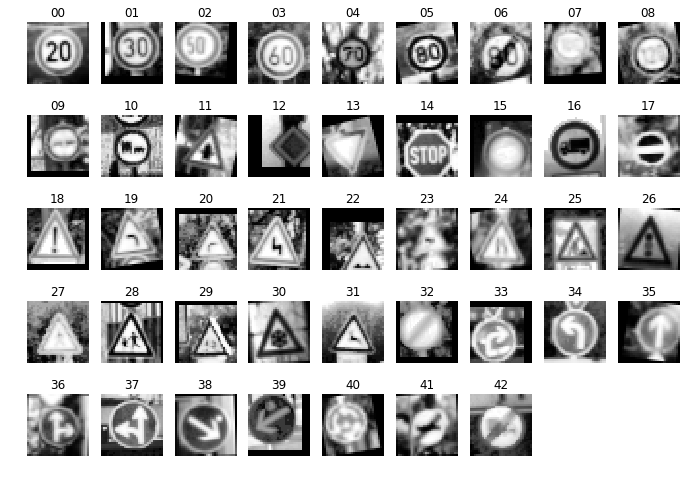

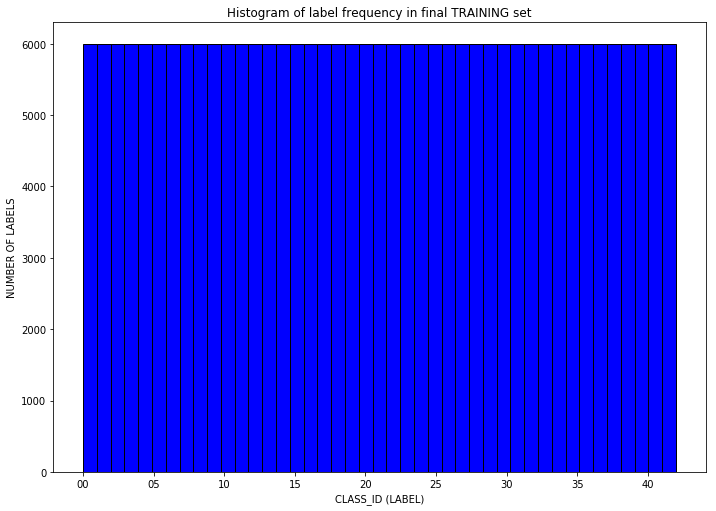

In [68]:
print("A few augmented, normalized samples of German traffic sign dataset\n")

fig, axes = plt.subplots(5, 9, figsize=(8, 8))
fig.set_size_inches(A4_LANDSCAPE)
class_id = 0
for row in axes:
    for ax in row:
        if class_id < n_classes:
            indexes = np.where(y_train_final == class_id)
            # Get only augmented data
            #print(original_training_data_counts)
            augm_idxs = indexes[0][original_training_data_counts[class_id]:]
            idx_rnd = np.random.choice(augm_idxs, 1)
            img_n = X_train_final[idx_rnd]
            ax.imshow(img_n[0,:,:,0], cmap='gray')
            ax.set_title('{:02d}'.format(class_id))
        ax.axis('off')
        ax.grid(False)         
        class_id += 1
plt.show()
plt.savefig('plots/A few augmented, normalized samples of German traffic sign dataset.png', bbox_inches='tight')

# Histogram of label frequency in TRAINING set
fig, ax = plt.subplots(figsize=A4_LANDSCAPE)

ax.set_ylabel('NUMBER OF LABELS')
ax.set_xlabel('CLASS_ID (LABEL)')
ax.set_title("Histogram of label frequency in final TRAINING set")

ax.hist(y_train_final, bins=n_classes, histtype='bar', color='blue', edgecolor='black', rwidth=1, align='mid')
ax.set_xticks(np.arange(0, n_classes, 5))
ax.set_xticklabels(['{:02d}'.format(c) for c in range(0, n_classes, 5)])

plt.show()
plt.savefig('plots/Histogram of label frequency in final TRAINING set.png', bbox_inches='tight')


### Model Architecture

In [69]:
### Helper functions
from tensorflow.contrib.layers import flatten

def conv2d(x, kernel, input_depth, output_depth, strides=1, padding='VALID', mu=0, sigma=0.1):
    shape = (kernel, kernel, input_depth, output_depth)
    W = tf.Variable(tf.truncated_normal(shape=shape, mean=mu, stddev=sigma))
    b = tf.Variable(tf.zeros(output_depth))
    conv = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    model = tf.add(conv, b)
    return model


def fullyConnected(x, input_size, output_size, mu=0, sigma=0.1):
    W = tf.Variable(tf.truncated_normal(shape=(input_size, output_size), mean=mu, stddev=sigma))
    b = tf.Variable(tf.zeros(output_size))
    fc = tf.matmul(x, W)
    model = tf.add(fc, b)
    return model


def relu(x):
    return tf.nn.relu(x)


def max_pool(x, k=2, padding='VALID'):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding=padding)


def dropout(x, keep_prob=0.5):
    return tf.nn.dropout(x, keep_prob)
    

In [70]:
### Define your architecture here.
# Dimensionality of CNN layers: HelperProjects/Convolutional-Neural-Networks/Dimensionality-of-CNN-layers.ipynb

def traffic_sign_net(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    global g_conv1, g_conv2, g_flat, g_fc1, g_fc2, g_dropped_fc1, g_dropped_fc2, g_logits

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = conv2d(x, 5, 1, 6, strides=1)
    print ('conv1 shape-->', conv1)
    # Relu Activation.
    g_conv1 = conv1 = relu(conv1)
    print ('conv1 relu activation-->', conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    pool_conv1 = max_pool(conv1, k=2)
    print ('conv1 max_pooling-->', pool_conv1)
    
    # Layer 2: Convolutional. Input = 14x14x6, Output = 10x10x16.
    conv2 = conv2d(pool_conv1, 5, 6, 16, strides=1)
    print ('conv2 shape-->', conv2)
    # Relu Activation.
    g_conv2 = conv2 = relu(conv2)
    print ('conv2 relu activation-->', conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    pool_conv2 = max_pool(conv2, k=2)
    print ('conv2 max_pooling-->', pool_conv2)

    
    # Flatten. Input = 5x5x16. Output = 400.
    flat = flatten(pool_conv2)
    print ('flattened layer shape-->', flat)


    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = fullyConnected(flat, 400, 120)
    print ('fc1 shape-->', fc1)
    # Relu Activation.
    fc1 = relu(fc1)
    print ('fc1 relu activation-->', fc1)
    # Dropout to prevent over-fitting
    dropped_fc1 = dropout(fc1, keep_prob)
    print ('fc1 dropout-->', dropped_fc1)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = fullyConnected(dropped_fc1, 120, 84)
    print ('fc2 shape-->', fc2)
    # Relu Activation.
    g_fc2 = fc2 = relu(fc2)
    print ('fc2 relu activation-->', fc2)
    # Dropout to prevent over-fitting
    dropped_fc2 = dropout(fc2, keep_prob)
    print ('fc2 dropout-->', dropped_fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = fullyConnected(dropped_fc2, 84, 43)
    print ('logits-->', logits)

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [71]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Placeholders
# x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

In [72]:
### Training pipeline
LEARNING_RATE = 0.0005
EPOCHS = 50
BATCH_SIZE = 128
model_name = 'traffic_sign_net'


logits = traffic_sign_net(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Create saver
saver = tf.train.Saver()

conv1 shape--> Tensor("Add_10:0", shape=(?, 28, 28, 6), dtype=float32)
conv1 relu activation--> Tensor("Relu_8:0", shape=(?, 28, 28, 6), dtype=float32)
conv1 max_pooling--> Tensor("MaxPool_4:0", shape=(?, 14, 14, 6), dtype=float32)
conv2 shape--> Tensor("Add_11:0", shape=(?, 10, 10, 16), dtype=float32)
conv2 relu activation--> Tensor("Relu_9:0", shape=(?, 10, 10, 16), dtype=float32)
conv2 max_pooling--> Tensor("MaxPool_5:0", shape=(?, 5, 5, 16), dtype=float32)
flattened layer shape--> Tensor("Flatten_2/Reshape:0", shape=(?, 400), dtype=float32)
fc1 shape--> Tensor("Add_12:0", shape=(?, 120), dtype=float32)
fc1 relu activation--> Tensor("Relu_10:0", shape=(?, 120), dtype=float32)
fc1 dropout--> Tensor("dropout_4/mul:0", shape=(?, 120), dtype=float32)
fc2 shape--> Tensor("Add_13:0", shape=(?, 84), dtype=float32)
fc2 relu activation--> Tensor("Relu_11:0", shape=(?, 84), dtype=float32)
fc2 dropout--> Tensor("dropout_5/mul:0", shape=(?, 84), dtype=float32)
logits--> Tensor("Add_14:0", shape

In [73]:
# Model Evaluation
# Evaluate how well the loss and accuracy of the model for a given dataset.
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [74]:
# Run the training data through the training pipeline to train the model.
# Before each epoch, shuffle the training set.
# After each epoch, measure the loss and accuracy of the validation set.
# Save the model for every better accuracy

best_epoch = 0
best_validation_accuracy = 0
history_results = []
dropout = 0.7

with tf.Session() as sess:
    if os.path.exists('checkpoint'):
        print("Restoring latest checkpoint: `{}.ckpt` for training".format(model_name))
        saver.restore(sess, tf.train.latest_checkpoint('.'))
    else:
        print("Training model: {}...".format(model_name))
        sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_n)

    for i in range(EPOCHS):
        X_train_final, y_train_final = shuffle(X_train_final, y_train_final)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_final[offset:end], y_train_final[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
        
        training_accuracy = evaluate(X_train_final, y_train_final)
        validation_accuracy = evaluate(X_valid_n, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        if validation_accuracy > best_validation_accuracy:
            best_validation_accuracy = validation_accuracy
            best_epoch = i
            saver.save(sess, './{}.ckpt'.format(model_name))
            print("Model saved for epoch: {} with validation accuracy: {}".format(i, validation_accuracy))
        history_results.append((i, training_accuracy, validation_accuracy))

Training model: traffic_sign_net...
EPOCH 1 ...
Training Accuracy = 0.358
Validation Accuracy = 0.452
Model saved for epoch: 0 with validation accuracy: 0.45215419499782206
EPOCH 2 ...
Training Accuracy = 0.520
Validation Accuracy = 0.622
Model saved for epoch: 1 with validation accuracy: 0.6219954642038497
EPOCH 3 ...
Training Accuracy = 0.568
Validation Accuracy = 0.685
Model saved for epoch: 2 with validation accuracy: 0.6845804992446554
EPOCH 4 ...
Training Accuracy = 0.637
Validation Accuracy = 0.729
Model saved for epoch: 3 with validation accuracy: 0.7285714283551759
EPOCH 5 ...
Training Accuracy = 0.672
Validation Accuracy = 0.772
Model saved for epoch: 4 with validation accuracy: 0.7721088433211623
EPOCH 6 ...
Training Accuracy = 0.705
Validation Accuracy = 0.808
Model saved for epoch: 5 with validation accuracy: 0.807709750593925
EPOCH 7 ...
Training Accuracy = 0.719
Validation Accuracy = 0.809
Model saved for epoch: 6 with validation accuracy: 0.8086167798290987
EPOCH 8 ...


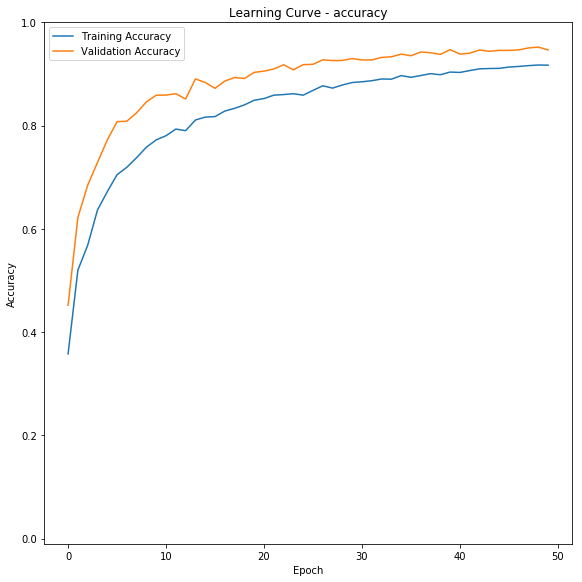

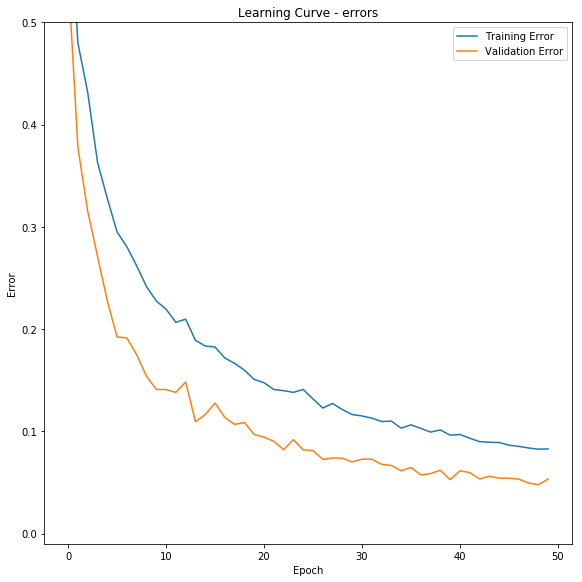

In [82]:
# Learning curves
plt.figure(figsize=(8,8))
plt.title('Learning Curve - accuracy')
plt.plot([acc[1] for acc in history_results])
plt.plot([acc[2] for acc in history_results])
plt.ylim([-.01,1.0])
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.tight_layout()
plt.ylabel('Accuracy')
plt.xlabel('Epoch');
plt.savefig('plots/Learning Curve - accuracy.png', bbox_inches='tight')

plt.figure(figsize=(8,8))
plt.title('Learning Curve - errors')
plt.plot([1 - err[1] for err in history_results])
plt.plot([1 - err[2] for err in history_results])
plt.ylim([-.01,0.5])
plt.legend(['Training Error','Validation Error'])
plt.tight_layout()
plt.ylabel('Error')
plt.xlabel('Epoch');
plt.savefig('plots/Learning Curve - errors.png', bbox_inches='tight')

In [76]:
#Evaluate the Model
#Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

#Be sure to only do this once!

#If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    training_accuracy = evaluate(X_train_final, y_train_final)
    validation_accuracy = evaluate(X_valid_n, y_valid)
    test_accuracy = evaluate(X_test_n, y_test)
    print("Training Accuracy = {:.3f}".format(training_accuracy))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./traffic_sign_net.ckpt
Training Accuracy = 0.917
Validation Accuracy = 0.952
Test Accuracy = 0.916


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

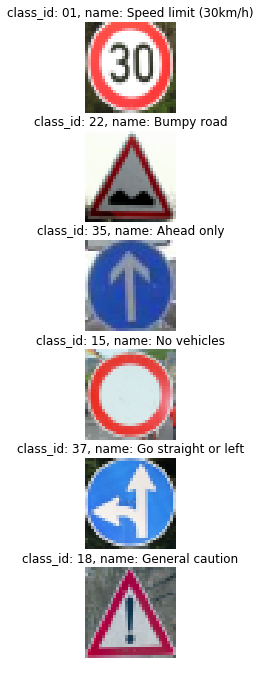

In [77]:
### Load the images and plot them here.
# load new images
new_sign_dir = './new-signs'
new_test_images = sorted(glob.glob(new_sign_dir+'/*.png'))
new_test_images = [cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB) for f in new_test_images]
#print(new_test_images)

# manually annotated labels for these new images
y_new_test_labels = [1, 22, 35, 15, 37, 18]

# plot new test images
fig, axes = plt.subplots(len(y_new_test_labels), 1, figsize=(8, 8))
fig.set_size_inches(A4_PORTRAIT)
for i, img in enumerate(new_test_images):
    axes[i].set_title('class_id: {:02d}, name: {}'.format(y_new_test_labels[i],sign_names[y_new_test_labels[i]]))
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].grid(False)
plt.show()
plt.savefig('plots/New test sign images set.png', bbox_inches='tight')



### Predict the Sign Type for Each Image

In [78]:
### Run the predictions here and use the model to output the prediction for each image.
# Preprocess the new signs dataset
X_new_test_n = preprocess_data(new_test_images)

# Model evaluation for new dataset
with tf.Session() as sess:
    # Restore saved session
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_new_test_n, y_new_test_labels)
    print("Test Accuracy on my images = {:.3f}".format(test_accuracy))
    

with tf.Session() as sess:
    # Restore saved session
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    # Predict on unseen images
    prediction = np.argmax(np.array(sess.run(logits, feed_dict={x: X_new_test_n, keep_prob: 1.})), axis=1)

for i, pred in enumerate(prediction):
    print('Image {} - Target = {:02d}, Predicted = {:02d}'.format(i, y_new_test_labels[i], pred))
    
print('> Model accuracy: {:.02f}'.format(np.sum(y_new_test_labels==prediction)/len(y_new_test_labels)))

INFO:tensorflow:Restoring parameters from ./traffic_sign_net.ckpt
Test Accuracy on my images = 0.667
INFO:tensorflow:Restoring parameters from ./traffic_sign_net.ckpt
Image 0 - Target = 01, Predicted = 00
Image 1 - Target = 22, Predicted = 22
Image 2 - Target = 35, Predicted = 35
Image 3 - Target = 15, Predicted = 07
Image 4 - Target = 37, Predicted = 37
Image 5 - Target = 18, Predicted = 18
> Model accuracy: 0.67


### Analyze Performance

In [79]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

INFO:tensorflow:Restoring parameters from ./traffic_sign_net.ckpt


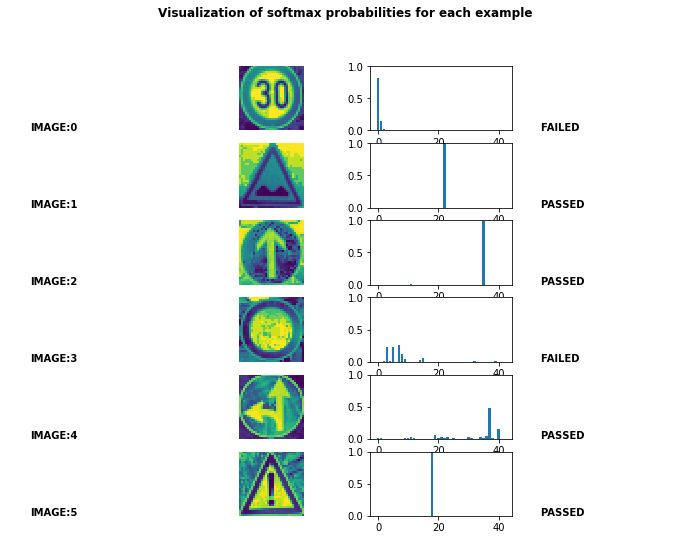


Top 3 model predictions for IMAGE:0 (Target is 01 [Speed limit (30km/h)])
   Prediction = 00 [Speed limit (20km/h)] with certainty 0.81
   Prediction = 01 [Speed limit (30km/h)] with certainty 0.15
   Prediction = 02 [Speed limit (50km/h)] with certainty 0.02

Top 3 model predictions for IMAGE:1 (Target is 22 [Bumpy road])
   Prediction = 22 [Bumpy road] with certainty 1.00
   Prediction = 29 [Bicycles crossing] with certainty 0.00
   Prediction = 25 [Road work] with certainty 0.00

Top 3 model predictions for IMAGE:2 (Target is 35 [Ahead only])
   Prediction = 35 [Ahead only] with certainty 1.00
   Prediction = 11 [Right-of-way at the next intersection] with certainty 0.00
   Prediction = 36 [Go straight or right] with certainty 0.00

Top 3 model predictions for IMAGE:3 (Target is 15 [No vehicles])
   Prediction = 07 [Speed limit (100km/h)] with certainty 0.26
   Prediction = 05 [Speed limit (80km/h)] with certainty 0.23
   Prediction = 03 [Speed limit (60km/h)] with certainty 0.22



In [80]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
K = 3
softmax = tf.nn.softmax(logits)
evaluate_softmax = tf.nn.softmax(logits)
evaluate_topk = tf.nn.top_k(evaluate_softmax, k=K)
   
with tf.Session() as sess:

    # Restore saved session
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    # Certainty of predictions
    top_k = sess.run(evaluate_topk, feed_dict={x: X_new_test_n, y: y_new_test_labels, keep_prob: 1.})

    # Compute softmax probabilities
    softmax_probs = sess.run(evaluate_softmax, feed_dict={x: X_new_test_n, y: y_new_test_labels, keep_prob: 1.})

# Plot softmax probabilities along with traffic sign examples
n_images = X_new_test_n.shape[0]
fig, axes = plt.subplots(n_images, 4)
fig.set_size_inches(A4_LANDSCAPE)
plt.suptitle('Visualization of softmax probabilities for each example', fontweight='bold')
for i in range(0, n_images):
    axes[i, 0].text(0, 0, 'IMAGE:{}'.format(i), fontweight='bold')
    axes[i, 0].axis('off')
    axes[i, 1].imshow(np.squeeze(X_new_test_n[i]))
    axes[i, 1].axis('off')
    axes[i, 2].bar(np.arange(n_classes), softmax_probs[i])
    axes[i, 2].set_ylim([0, 1])
    axes[i, 3].text(0, 0, 'PASSED' if y_new_test_labels[i]==top_k[1][i][0] else 'FAILED', fontweight='bold')
    axes[i, 3].axis('off')
plt.show()
plt.savefig('plots/Visualization of softmax probabilities for each example.png', bbox_inches='tight')
    
# Print top K predictions of the model for each example, along with confidence (softmax score)    
for i in range(len(X_new_test_n)):
    print('\nTop {} model predictions for IMAGE:{} (Target is {:02d} [{}])'.format(K, i, y_new_test_labels[i], sign_names[y_new_test_labels[i]]))
    for k in range(K):
        top_c = top_k[1][i][k]
        print('   Prediction = {:02d} [{}] with certainty {:.2f}'.format(top_c, sign_names[top_c], softmax_probs[i][top_c]))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


INFO:tensorflow:Restoring parameters from ./traffic_sign_net.ckpt
Feature maps for: Speed limit (70km/h)


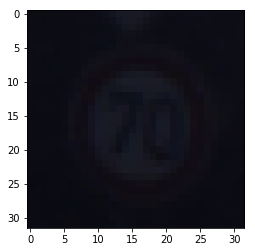

First convolutional layer:
Second convolutional layer:


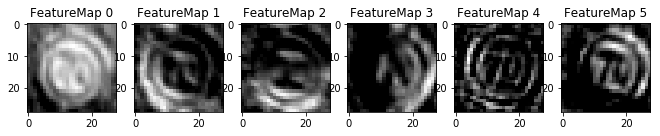

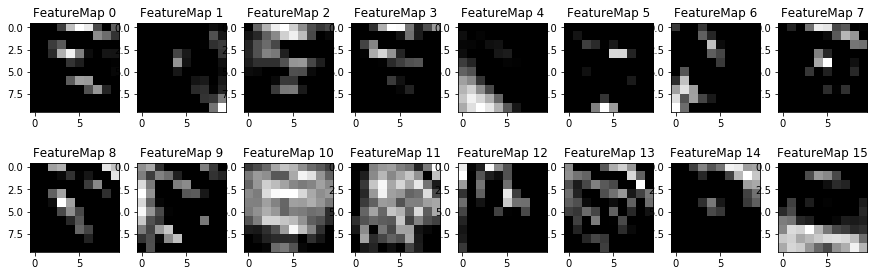

In [81]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    plt.savefig('plots/Feature map {}.png'.format(plt_num) ,bbox_inches='tight')

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    idx = int(np.random.random() * X_test_n.shape[0])
    random_image = np.expand_dims(X_test_n[idx], axis=0)
    print('Feature maps for:', sign_names[y_test[idx]])
    plt.imshow(X_test[idx], cmap='gray')
    plt.show()
    print('First convolutional layer:')
    layer1 = g_conv1
    outputFeatureMap(random_image, layer1, plt_num=1)
    print('Second convolutional layer:')
    layer2 = g_conv2
    outputFeatureMap(random_image, layer2, plt_num=2)